In [4]:
import sys
import pandas as pd 
import numpy as np
import pickle
import seaborn as sns
sys.path.append('../Advanced-statistics/modules/')
from analysis_plot import *
from utils import *
import warnings
warnings.filterwarnings('ignore')

from IPython.display import Image 


%matplotlib inline

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib import cm

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']
cmap_big = cm.get_cmap('Spectral', 512)
cmap = mcolors.ListedColormap(cmap_big(np.linspace(0.7, 0.95, 256)))

bbox_props = dict(boxstyle="round,pad=0.3", fc=colors[0], alpha=.5)

#  Analytical solution of the SCIR model at low fraction of infected individuals

The SCIR model includes the usual states of an SIR model plus a new class C for individuals
sent to confinement that are susceptible but not infected.

## Fit ending before peak data for the daily number of active cases
fit from 2020-02-24 to 2020-03-29 with confinement measure aplied on 2020-03-09

# Dataset Italy
The data is taken from Protezione Civile site, starting from 2020.02.24.

In [7]:
df = pd.read_csv('../Advanced-statistics/Data/dataset_ita.csv')

df

,Day,Confirmed,Recovered,Death,Confirmed_smooth,Recovered_Death,Recovered_Death_smooth
0,2020.02.24,221,1,7,221.000000,0.0,0.000000
1,2020.02.25,311,1,10,266.000000,3.0,1.500000
2,2020.02.26,385,3,12,305.666667,4.0,2.333333
3,2020.02.27,588,45,17,376.250000,47.0,13.500000
4,2020.02.28,821,46,21,465.200000,5.0,11.800000
...,...,...,...,...,...,...,...
463,2021.06.01,225751,3868332,126221,242739.857143,10406.0,9258.000000
464,2021.06.02,210050,3886867,126283,235600.000000,18597.0,10193.142857
465,2021.06.03,205562,3893259,126342,228795.571429,6451.0,9546.285714
466,2021.06.04,200192,3901112,126415,222213.000000,7926.0,9155.714286


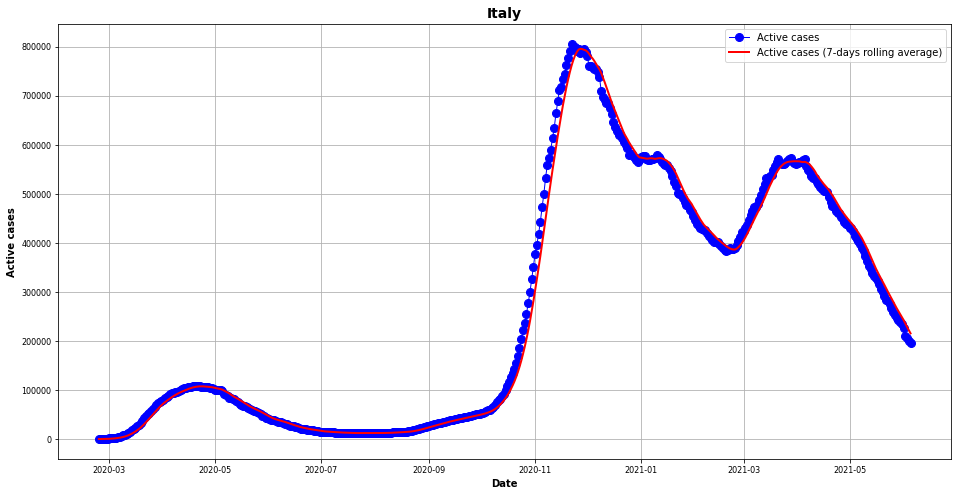

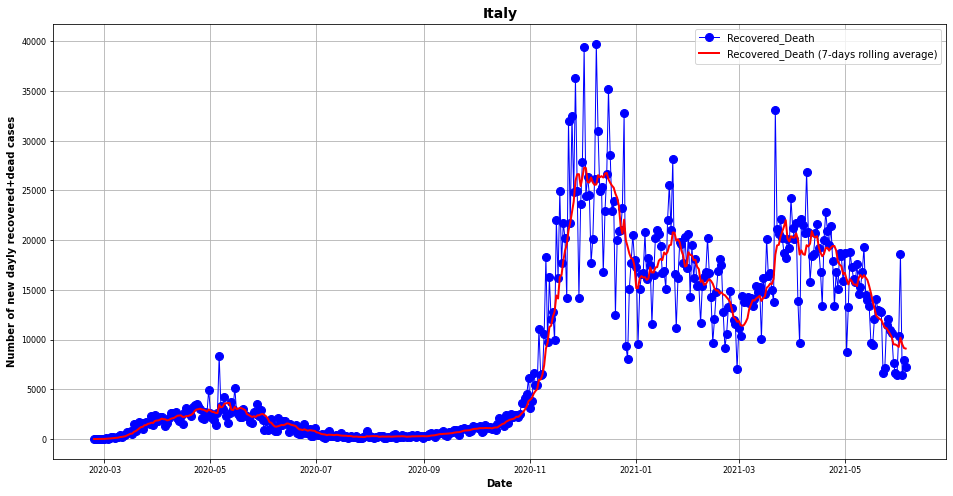

In [8]:
# save figure with plot from january
plt.plot(pd.to_datetime(df.Day), df.Confirmed, 'bo-', lw=1, label='Active cases')
plt.plot(pd.to_datetime(df.Day), df.Confirmed_smooth, 'r', lw=2, label='Active cases (7-days rolling average)')
plt.xlabel('Date')
plt.ylabel('Active cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("active_cases_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

plt.plot(pd.to_datetime(df.Day), df.Recovered_Death, 'bo-', lw=1, label='Recovered_Death')
plt.plot(pd.to_datetime(df.Day), df.Recovered_Death_smooth, 'r', lw=2, label='Recovered_Death (7-days rolling average)')
ymin, ymax = plt.ylim()
plt.xlabel('Date')
plt.ylabel('Number of new dayly recovered+dead cases')
plt.title('Italy', weight='bold', fontsize=14)
plt.legend()
plt.grid()
#plt.savefig("recovered_death_data_Spain.png", quality=100, transparent=True, dpi=400)
plt.show()

## Fit ending before peak data
fit from 2020-02-27 to 2020-03-29 with confinement measure aplied on 2020-03-11

In [11]:
filehandler = open('../Advanced-statistics/Results/ita/first_wave/results_before_peak_ita.pkl', 'rb')
res_1 = pickle.load(filehandler)

In [32]:
f, t = np.unique((res_1['rmu'] * (res_1['p'] + res_1['q'])) > (res_1['beta'] * res_1['p']), return_counts=True)[1]
t / (t + f)

0.531296

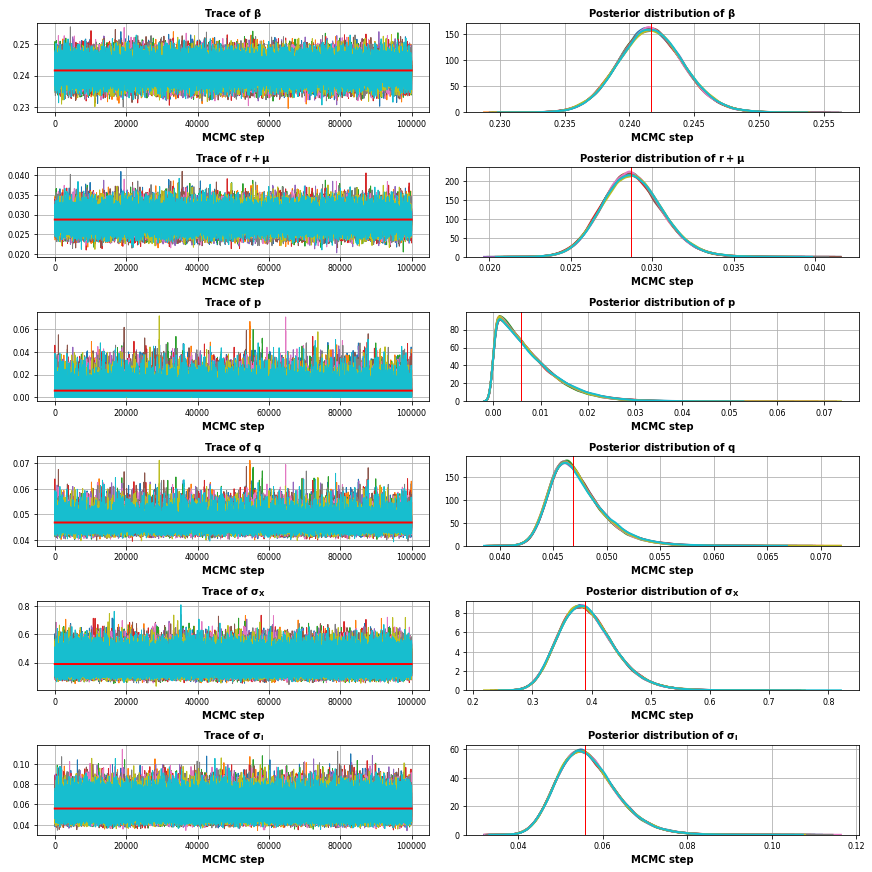

In [9]:
plot_summary(res_1)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/plot_summary_before_peak_ita.png", quality=100, transparent=True, dpi=400)

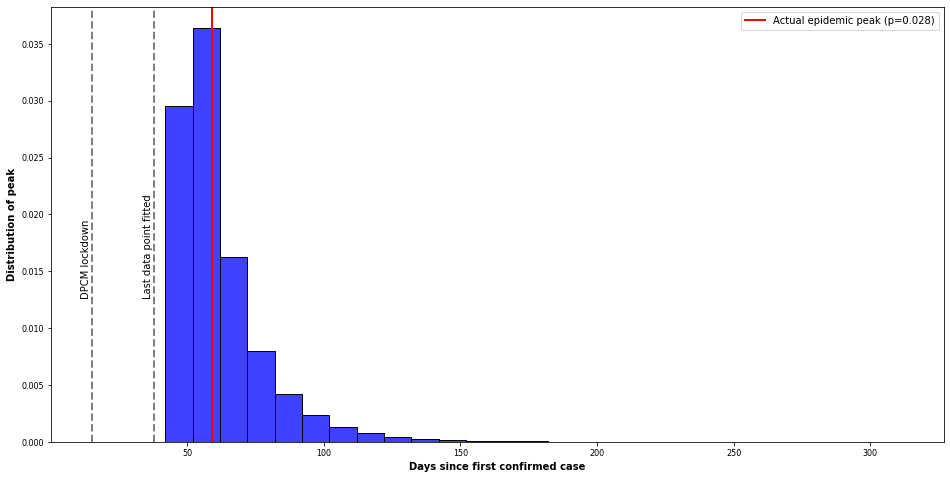

In [12]:
peak_posterior(res_1, offset=4)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/peak_posterior.png", quality=100, transparent=True, dpi=400)

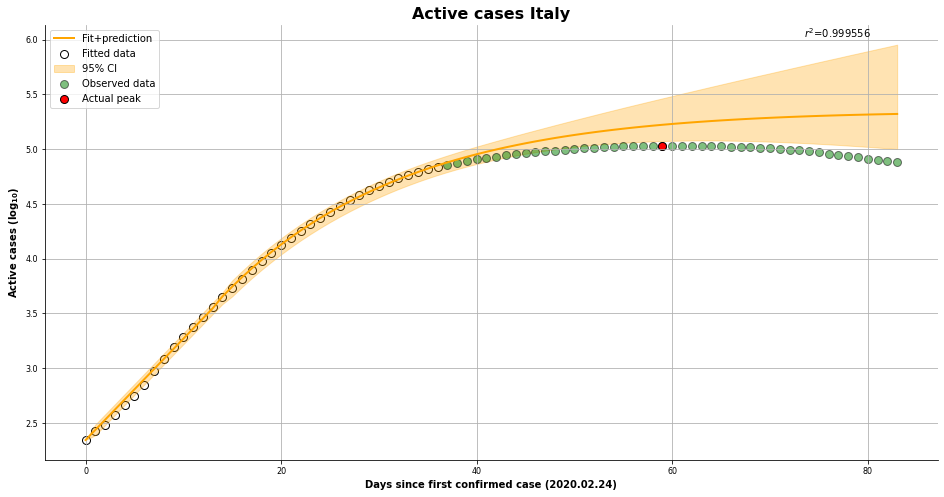

In [14]:
plot_results(res_1, ci=95, Y=True, Z=False, observed=True)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/active_cases_before.png", quality=100, transparent=True, dpi=400)

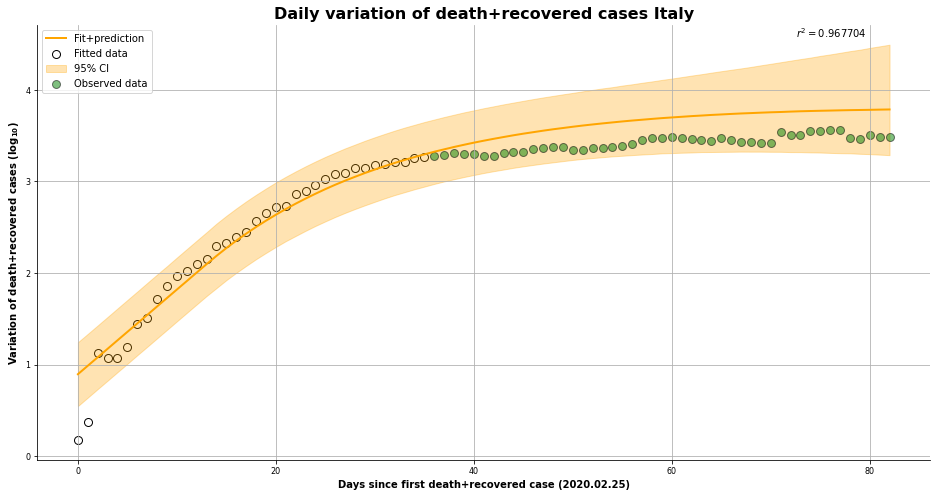

In [15]:
plot_results(res_1, ci=95, Y=False, Z=True, observed=True)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/death_recovered_before.png", quality=100, transparent=True, dpi=400)

## Fit ending after peak data for the daily number of active cases

In [16]:
filehandler = open('../Advanced-statistics/Results/ita/first_wave/results_after_peak_ita.pkl', 'rb')
res_2 = pickle.load(filehandler)

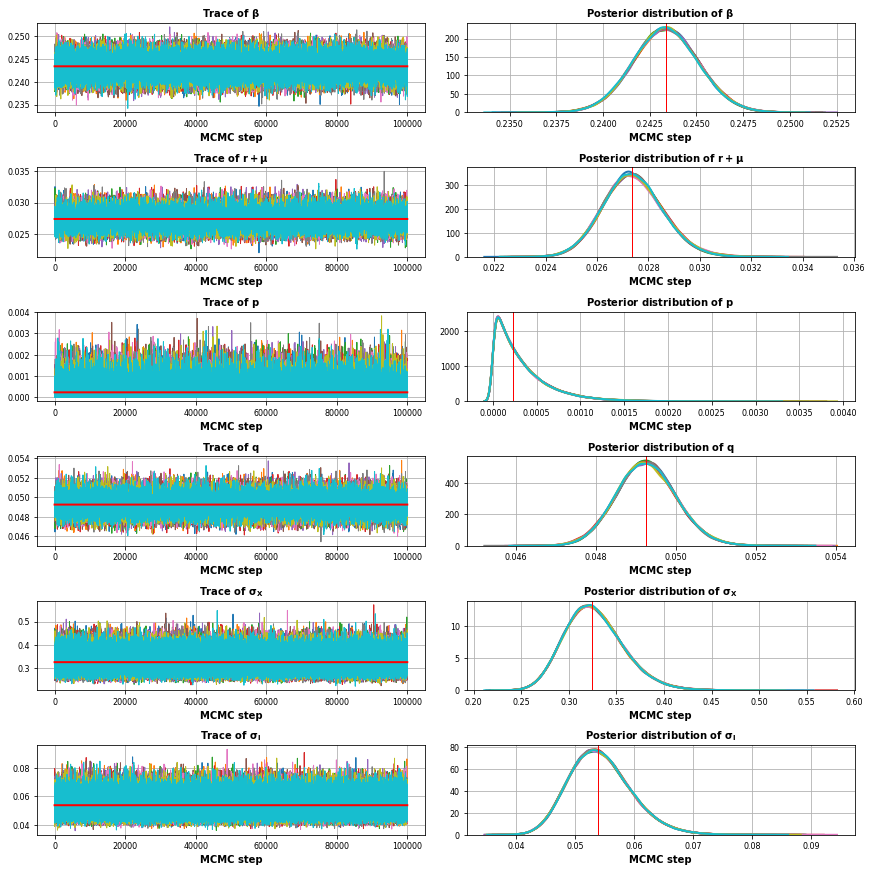

In [17]:
plot_summary(res_2)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/plot_summary_after_peak_ita.png", quality=100, transparent=True, dpi=400)

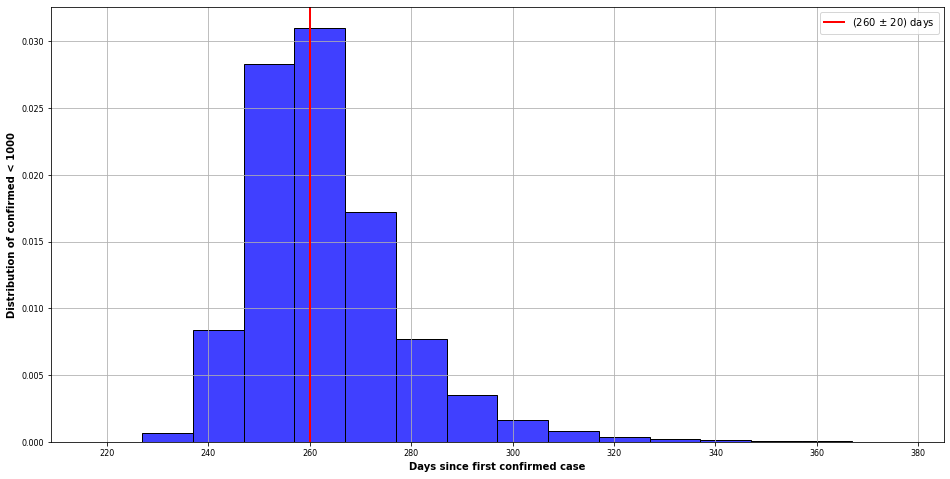

In [18]:
end_epidemic_plot(res_2, '2021.03.01')
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/end_epidemic_posterior.png", quality=100, transparent=True, dpi=400)

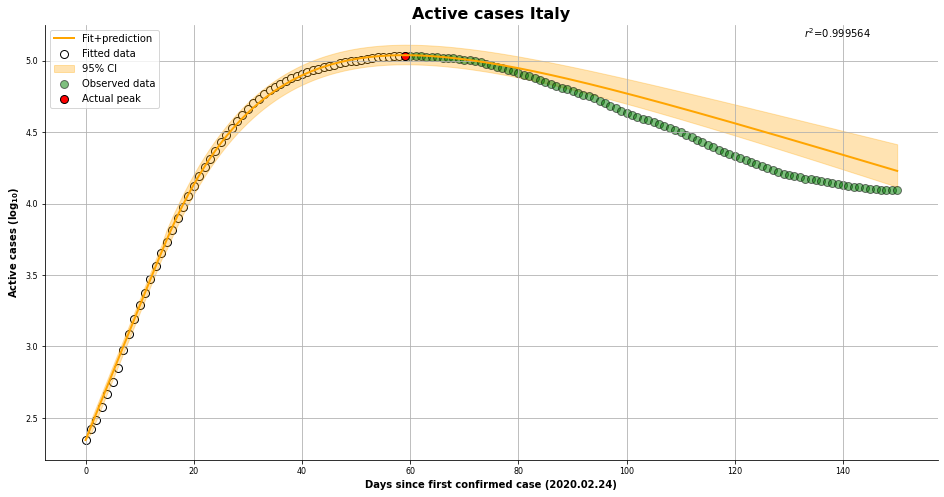

In [19]:
plot_results(res_2, ci=95, Y=True, Z=False, observed=True)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/active_cases_after.png", quality=100, transparent=True, dpi=400)

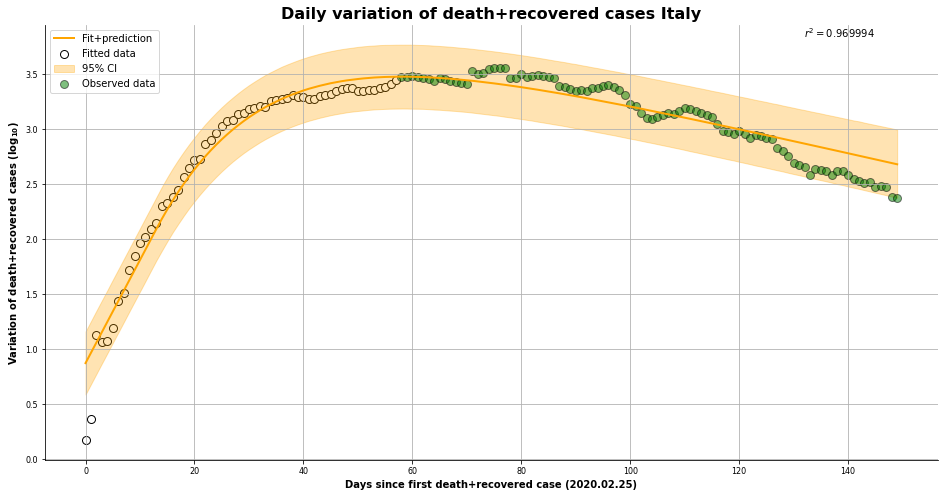

In [20]:
plot_results(res_2, ci=95, Y=False, Z=True, observed=True)
plt.savefig("../Advanced-statistics/Results/ita/first_wave/plot/death_recovered_after.png", quality=100, transparent=True, dpi=400)